### Student Information
Name:黃啟昊

Student ID:109033583

GitHub ID:jeffery625988

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [97]:
#Part 2
#Data preparation
#read text data in to dictionary

Whole_data = []
#amazon
file = open('amazon_cells_labelled.txt','r')
for line in file:
    
    words = line.split()
    t = ' '.join(words[:-1])
    c = words[-1]
    
    _dict = {}
    _dict['text'] = t 
    _dict['label'] = c
    
    Whole_data.append(_dict)

#imdb
file = open('imdb_labelled.txt','r',encoding="utf-8")  

for line in file:
    
    words = line.split()
    t = ' '.join(words[:-1])
    c = words[-1]
    
    _dict = {}
    _dict['text'] = t 
    _dict['label'] = c
    
    Whole_data.append(_dict)


#yelp
file = open('yelp_labelled.txt','r')

for line in file:
    
    words = line.split()
    t = ' '.join(words[:-1])
    c = words[-1]
    
    _dict = {}
    _dict['text'] = t 
    _dict['label'] = c
    
    Whole_data.append(_dict)
    

In [98]:
#trans dictionary into pandas data frames
import pandas as pd


X = pd.DataFrame(Whole_data[:])
print(X[:10])
print(len(X))

                                                text label
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1
5  I have to jiggle the plug to get it to line up...     0
6  If you have several dozen or several hundred c...     0
7        If you are Razr owner...you must have this!     1
8                Needless to say, I wasted my money.     0
9                   What a waste of money and time!.     0
3000


In [99]:
#simple query test
print(X[0:10][['text']])
print('\n')

#using Loc
print(X.loc[::10,'text'][0:10])
print('\n')

#get method
print(X.get('text')[0:10])

                                                text
0  So there is no way for me to plug it in here i...
1                        Good case, Excellent value.
2                             Great for the jawbone.
3  Tied to charger for conversations lasting more...
4                                  The mic is great.
5  I have to jiggle the plug to get it to line up...
6  If you have several dozen or several hundred c...
7        If you are Razr owner...you must have this!
8                Needless to say, I wasted my money.
9                   What a waste of money and time!.


0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                     

In [100]:
#Find missing value
X.isnull()

import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x),axis =1)



0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [101]:
#Dealing with Duplicate Data
X.duplicated()

sum(X.duplicated())

sum(X.duplicated('text'))

18

In [102]:
#Data preprocessing

#Sampling
X_sample = X.sample(n=1000) #random state

In [103]:
X_sample[0:4]

,text,label
398,"Sounds good reasonably priced and effective, I...",1
1686,This is just a great movie.,1
2855,My fella got the huevos rancheros and they did...,0
464,poor voice clarity.,0


1    1500
0    1500
Name: label, dtype: int64
1    517
0    483
Name: label, dtype: int64


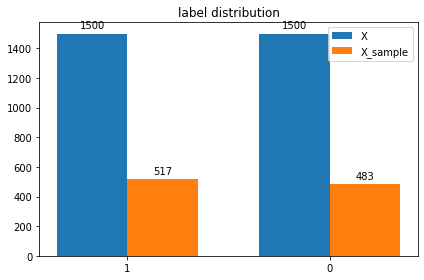

In [104]:
#plot 
import matplotlib.pyplot as plt
import numpy as np
print(X.label.value_counts())
print(X_sample.label.value_counts())

labels = []
for i in X_sample.label :
    if i not in labels:
        labels.append(i)

X_ = []
for i in range(2):
    X_.append(X.label.value_counts()[i])

X_Sample = []
for i in range(2):
    X_Sample.append(X_sample.label.value_counts()[i])
    


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, X_, width, label='X')
rects2 = ax.bar(x + width/2, X_Sample, width, label='X_sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('label distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [105]:
#Feature Creation
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [106]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [107]:
X[0:4]

,text,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [108]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [109]:
X_counts.shape

(3000, 5155)

In [110]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

(20, 20)


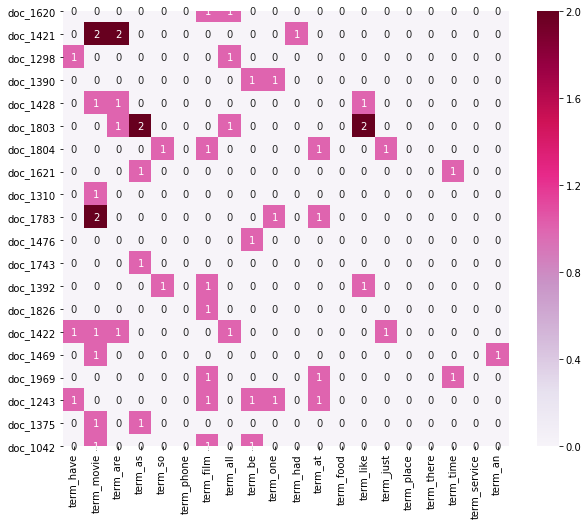

In [111]:
#Heat map
import seaborn as sns


A = X_counts[:,:].toarray()

#let the top 20(or how many data we need)sentence which has most word be presented


doc_word = np.sum(A,axis=1)
present_doc_index = sorted(range(len(doc_word)), key=lambda k: doc_word[k],reverse=True)[0:20]
present_doc = []

for i in present_doc_index:
    present_doc.append("doc_"+ str(list(X.index)[i]))
    
        

#let the top 20 - 40(cause 1-19 word is the,it... they are not helpful)words which has appeared most be presented


text_freq = np.sum(A,axis=0)
present_text_index = sorted(range(len(text_freq)), key=lambda k: text_freq[k],reverse=True)[20:40]
present_text = []

for i in present_text_index:
    present_text.append("term_"+str(count_vect.get_feature_names()[i]))


        


#plot
plot_x = present_text
plot_y = present_doc
plot_z = np.zeros((20,20),dtype=int)
a=0
for i in present_text_index:
    b=0
    for j in present_doc_index:
        plot_z[b][a] = X_counts[j,i]
        b=b+1
        
    a=a+1
    

print(plot_z.shape)
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 8))
max_word = max(np.sum(A,axis=0))

ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)


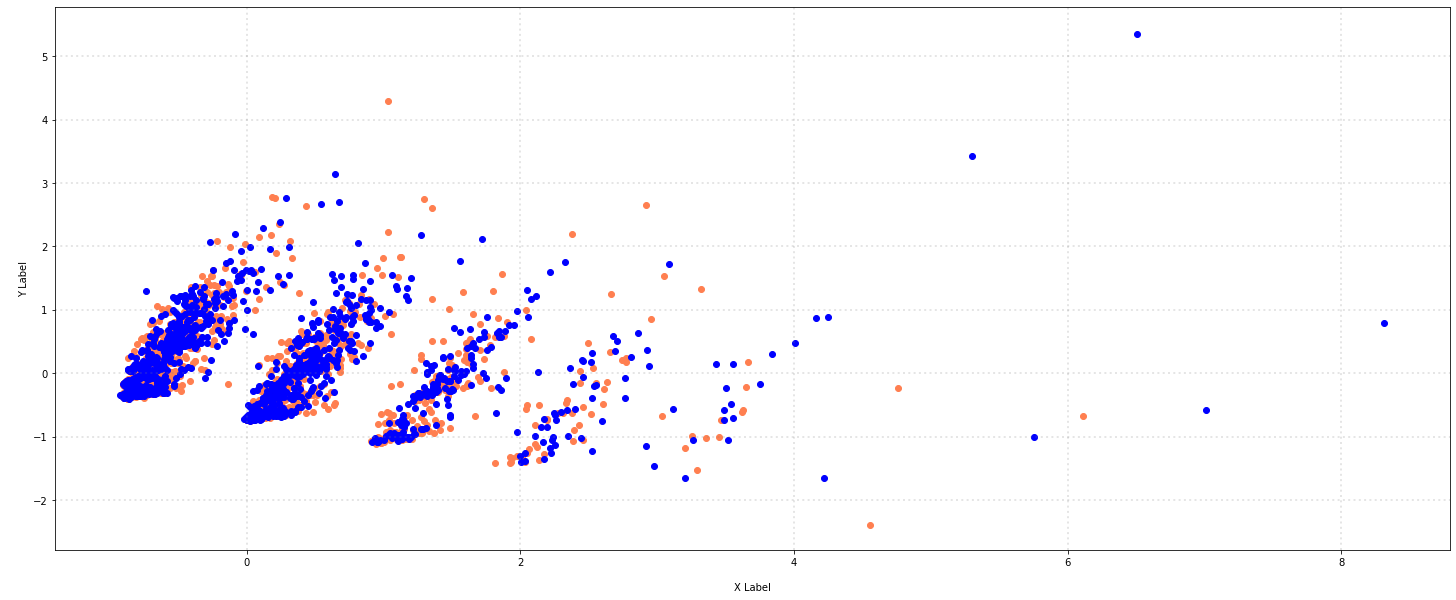

In [112]:
#Dimensionality Reduction
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray()) #reduce to 2 dimension

col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, X.label):
    xs = X_reduced[X['label'] == category].T[0]
    ys = X_reduced[X['label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [113]:
#Atrribute Transformation / Aggregation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [114]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

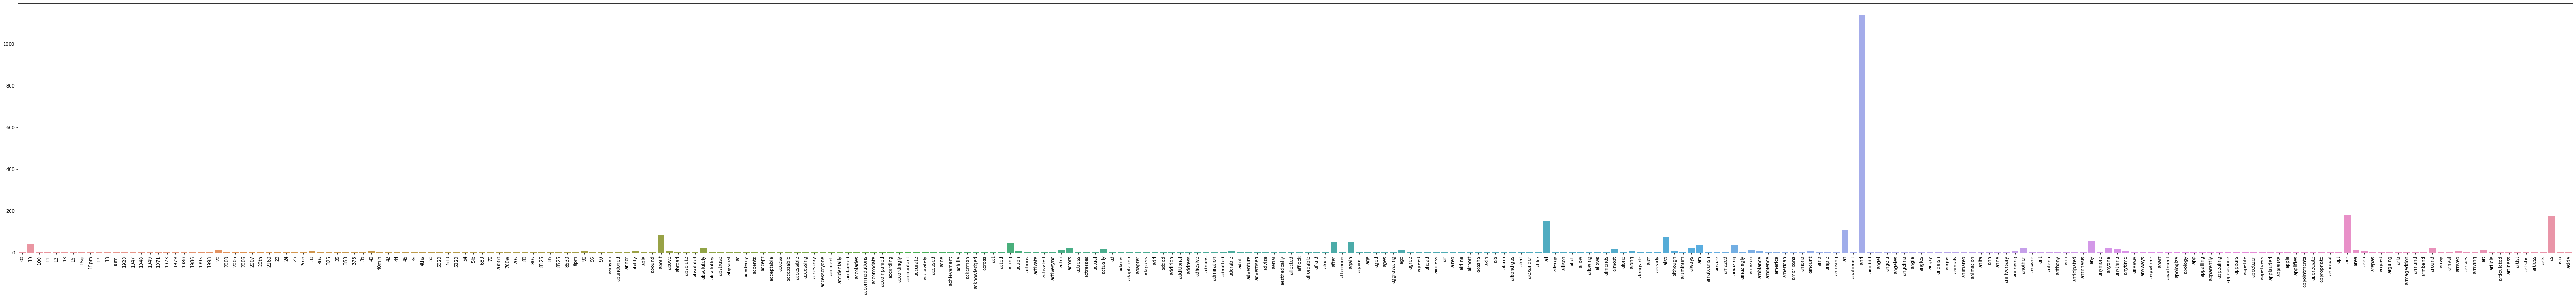

In [115]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [116]:
#present the data which freqency is above the threshold 
import plotly.graph_objects as go
A = X_counts[:,:].toarray()

x=["term_"+str(i) for i in count_vect.get_feature_names()[:300]]
term_freq =np.sum(A,axis=0)[:300]
sort_index = sorted(range(len(term_freq)), key=lambda k: term_freq[k])
mean = np.mean(term_freq)
#threshold = freq's mean
threshold = mean                          
term_freq = np.sort(term_freq)
point=149
j=300/2

for i in range(10):
    if term_freq[point]>threshold:
        if term_freq[point-1]<threshold:
            break
        else:
            j=j/2
            point=int(point-j)
    elif term_freq[point]<threshold:
        if term_freq[point+1]>threshold:
            break
        else:
            j=j/2
            point=int(point+j)
    else:
        break

        
presented_x = []
for i in sort_index[point:]:
    presented_x.append(x[i])
presented_y = term_freq[point:]
    
fig = go.Figure(go.Bar(x=presented_x, y=presented_y, name='text_frequencies'))

fig.update_layout(title='text_frequencies',barmode='group')
fig.show()

In [117]:
#Discretization and Binarization
#cause only has two category i think it's not need to do Binarize

In [ ]:
#Part 3
#meaningful data visualizations

In [128]:
#generate TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
TF_IDF = vectorizer.fit_transform(X.text)


print(TF_IDF.shape)


(3000, 5155)


In [134]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

#build from TF IDF
x = TF_IDF
y = X.label
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))

#build from frequency feature
x = X_counts
y = X.label
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))


0.8173333333333334
0.8373333333333334
